# Visualizing the Coilgun

## Background

I began this project with the intention of constructing a coilgun. However, one broken microwave later, I realized that I was missing many of the parts required to build a railgun. The capacitor that I had managed to harvest from the microwave was extremely high voltage (rated for >2000 Volts!), which would have been rather dangerous for a home experiment, where the voltage coming out of the wall is only 120 Volts. 

## Theory

The coilgun, similar to the somewhat-more-commonly-known "railgun", is a logical extension of the human tendency to exploit natural phenomena towards violence. In particular, it was discovered that a solenoid (consisting of conducting wire wrapped in loops around a core) creates a magnetic field aligned with the primary axis of the solenoid. This magnetic field is additionally proportional to the number of loops or turns created by the wrapped wire, (for an infinite solenoid) described by:
$$
B = \mu_0nI,
$$
where $n$ is the number of turns per unit length, $I$ is the current, and $\mu_0$ is the vacuum permeability.

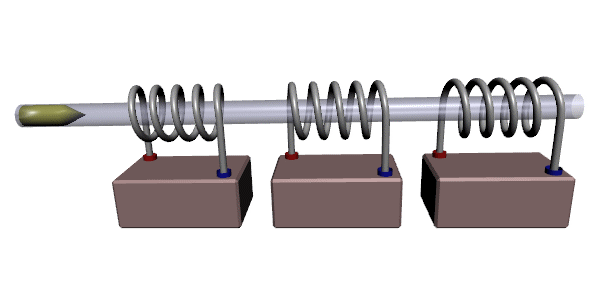\
<sub>Image credit: https://en.wikipedia.org/wiki/Coilgun</sub>

To see that the magnetic field must be aligned with the primary axis of the solenoid is simple. First, consider the long straight wire. From Biot-Savart, we know that the magnetic field of such a wire is 
$$
\bold{B} = \frac{\mu_0(\bold{I} \times \hat{r})}{2\pi r} = \frac{\mu_0 I}{2\pi r} \hat{\phi}
$$

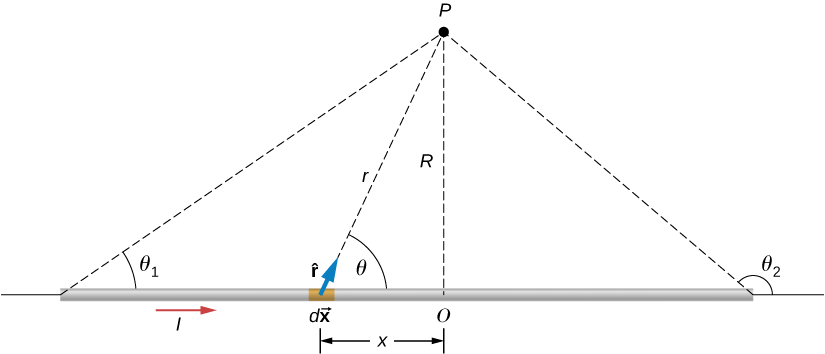\
<sub>Image credit: https://phys.libretexts.org/Bookshelves/University_Physics/Book%3A_University_Physics_(OpenStax)/Book%3A_University_Physics_II_-_Thermodynamics_Electricity_and_Magnetism_(OpenStax)/12%3A_Sources_of_Magnetic_Fields/12.03%3A_Magnetic_Field_due_to_a_Thin_Straight_Wire</sub>

The figure below shows the magnetic field generated by a current passing through a wire (in red). 

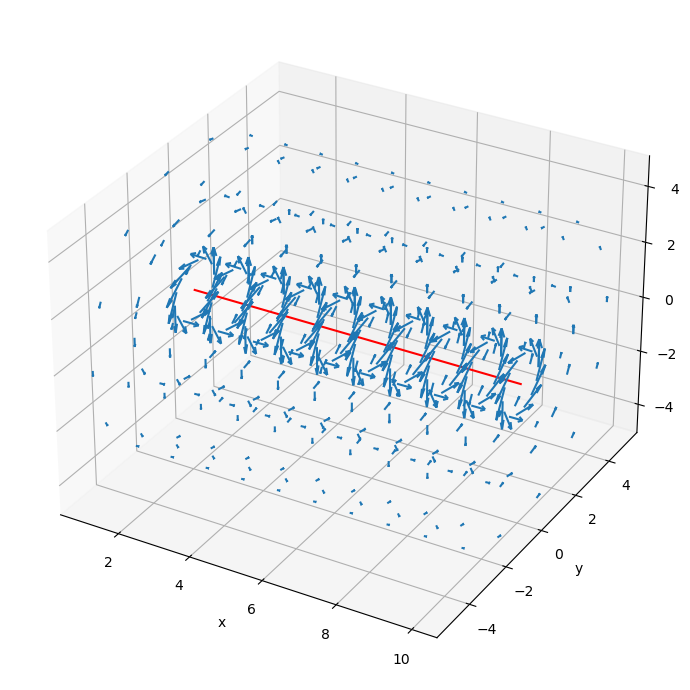

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets

fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(111, projection='3d')

# Create the space in cylindrical coordinates
phi = np.linspace(0, 2*np.pi, 15)
r = np.linspace(1, 5, 3)
x = np.linspace(1, 10, 10)

# Find the strength of the magnetic field at any [cylindrical] point in space
def B(r, theta, x, I):
    # r = np.sqrt(y**2 + z**2)
    return I/r

# Calculate the vector of B at every point (x, r, phi), converted to cartesian
y,z,u,v,w = [],[],[],[],[]
for X in x:
    for R in r:
        for P in phi:
            y = np.append(y, R * np.cos(P))
            z = np.append(z, R * np.sin(P))
            u = np.append(u, 0)
            v = np.append(v, B(R, P, X, 1) * -np.sin(P))
            w = np.append(w, B(R, P, X, 1) * np.cos(P))

x = np.repeat(x, len(r) * len(phi))

ax.quiver(x, y, z, u, v, w)

# plot "wire" along x-axis
ys = np.repeat(0, len(x))
zs = np.repeat(0, len(x))
ax.plot(x, ys, zs, c = 'red')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.tight_layout()

Next, consider a conducting wire in a circular loop:

Text(0.5, 0, 'z')

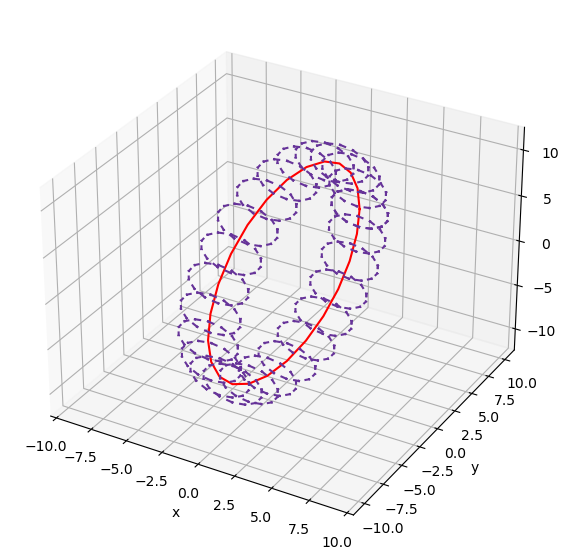

In [336]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets

def B(r, phi, x, I):
    return I/r

def B_paramaterized(points, radius):
    phis = np.linspace(0, 2*np.pi, 15)
    rs = [radius]
    x,y,z,u,v,w = [],[],[],[],[],[]
    for point in points:
        r_, phi_, xx = point
        for r in rs:
            for phi in phis:
                x_ = xx + r * np.cos(phi)
                y_ = r_ * np.cos(phi_)
                z_ = r_ * np.sin(phi_) + r * np.sin(phi)
                x = np.append(x, x_)
                y = np.append(y, y_)
                z = np.append(z, z_)
                u = np.append(u, B(r, phi, x_, 1) * -np.sin(phi))
                v = np.append(v, 0)
                w = np.append(w, B(r, phi, x_, 1) * np.cos(phi))
    return x,y,z,u,v,w

def cylindrical_to_cartesian(points):
    x,y,z,u,v,w = [],[],[],[],[],[]
    for point in points:
        r_, phi_, x_ = point
        x = np.append(x, x_)
        y = np.append(y, r_ * np.cos(phi_))
        z = np.append(z, r_ * np.sin(phi_))
    return x, y, z

phi = np.linspace(0, 2*np.pi, 25)
x = np.repeat(0, len(phi))
r = np.repeat(10, len(phi))

X,Y,Z = cylindrical_to_cartesian(zip(r, phi, x))

fig = plt.figure(figsize = (7, 7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(X,Y,Z, color = 'red')

X,Y,Z,U,V,W = B_paramaterized(zip(r, phi, x), 2)
plt.quiver(X,Y,Z,U,V,W, color = 'rebeccapurple')
# X,Y,Z,U,V,W = B_paramaterized(zip(r, phi, x), 4)
# plt.quiver(X,Y,Z,U,V,W, color = 'mediumorchid')

ax.set_xlim(-10, 10)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

It is easy to see that the magnetic field in this case circles the wire similarly "circles" the wire. However, in this example, the field loops along the wire ultimately meet, creating a net magnetic field reminiscent in shape as that of a torus. Then, if we, logically, increase the number of current-carrying loops, we have that the magnetic fields due to the wire loops add together, and the "magnetic field torus" becomes more and more extreme in depth (in layman's terms: imagine a donut getting taller and taller, but not getting any wider or tastier):

Text(0.5, 0, 'z')

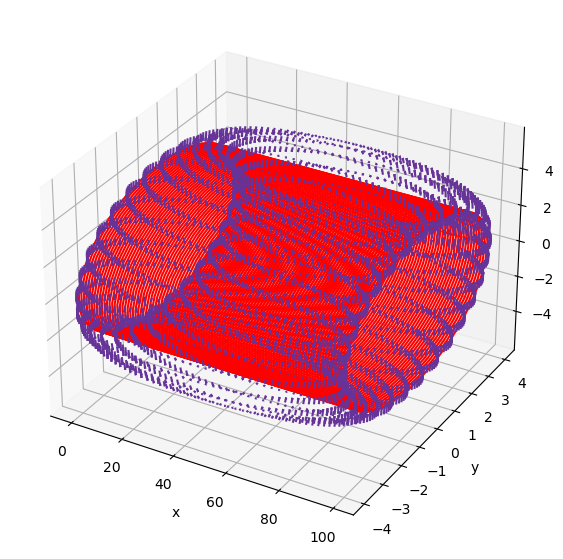

In [206]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets

def B(r, phi, x, I):
    return I/r

def B_paramaterized(points, radius, numloops):
    phis = np.linspace(0, 2*np.pi, 111)
    rs = [radius]
    points = list(points)
    x,y,z = [],[],[]
    U = np.repeat(0, 375)
    V = np.repeat(0, 375)
    W = np.repeat(0, 375)
    for _ in range(numloops):
        x,y,z,u,v,w = [],[],[],[],[],[]
        for point in points:
            r_, phi_, xx = point
            for r in rs:
                for phi in phis:
                    x_ = (numloops-1)/2 + (numloops+1)/2 * np.cos(phi)
                    y_ = r_ * np.cos(phi_)
                    z_ = r_ * np.sin(phi_) + r * np.sin(phi)
                    x = np.append(x, x_)
                    y = np.append(y, y_)
                    z = np.append(z, z_)
                    u = np.append(u, B(r, phi, x_, 1) * -np.sin(phi))
                    v = np.append(v, 0)
                    w = np.append(w, B(r, phi, x_, 1) * np.cos(phi))
    return x,y,z,u, v, w

def cylindrical_to_cartesian(points):
    x,y,z,u,v,w = [],[],[],[],[],[]
    for point in points:
        r_, phi_, x_ = point
        x = np.append(x, x_)
        y = np.append(y, r_ * np.cos(phi_))
        z = np.append(z, r_ * np.sin(phi_))
    return x, y, z

phi = np.linspace(0, 2*np.pi, 30)
x = np.repeat(0, len(phi))
r = np.repeat(4, len(phi))

fig = plt.figure(figsize = (7, 7))
ax = fig.add_subplot(111, projection='3d')

numloops = 100

X,Y,Z,U,V,W = B_paramaterized(zip(r, phi, x), 2, numloops)
plt.quiver(X,Y,Z,U,V,W, color = 'rebeccapurple')

for i in range(numloops):
    x = np.repeat(i, len(phi))
    X,Y,Z = cylindrical_to_cartesian(zip(r, phi, x))

    ax.plot(X,Y,Z, color = 'red')

# ax.set_xlim(-10, 10)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

Hence, as we increase the number of current-loops to arbitrarily large, we recover the familiar solenoid, with a strong, controlled magnetic field directing along the solenoid axis.



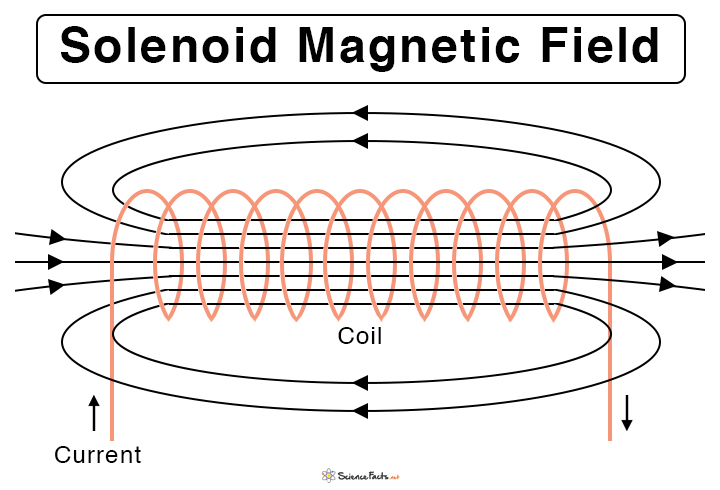\
<sub>Image credit: https://www.sciencefacts.net/solenoid-magnetic-field.html</sub>

It becomes clear, then, that we can harness this tightly-bound magnetic field to propel a ferromagnetic projectile. The underlying principle behind coilguns is thus exceedingly simple: the current loops in the coilgun generate magnetic flux through the center of the barrel, where a ferromagnetic projectile sits. As the projectile moves towards the current loops, the generated magnetic flux magnetizes the projectile, attracting it towards the center of the coil, and accelerating it along the barrel.

## Limitations

The coilgun, at first glance, sounds very attractive. It does not suffer many of the same limitations as that of a railgun: railguns require constant contact between projectile and conducting rails, leading to extremely fast wear on the armature. Additionally, the coilgun itself is easier to maintain and repair, as the coils are easily replaceable and the currents required to achieve comparable projectile velocities as a railgun are much lower. 
However, the design of the coilgun ultimately limits its efficiency: the same physical phenomenon that attracts a projectile toward the coil (and down the barrel) also tries to pull the projectile back up the barrel after it leaves the coil. Hence, in order to prevent what is known as "suck back", the current in the coil must be turned off just as the projectile reaches the midway point of the coil, where the magnetic field is strongest.
This can be seen by examining the magnetic field of a $\it{finite}$ solenoid:
$$
\bold{B} = \frac{\mu_0nI}{2}\left(\frac{x+L}{\sqrt{(x+L)^2 + r^2}} - \frac{x-L}{\sqrt{(x-L)^2 + r^2}} \right) \hat{x},
$$
Where the solenoid points along the $x$-axis, and $L$ is the distance that the solenoid extends past the origin in each direction. 
Plotting this, we can easily see that the magnetic field is highest at the center.

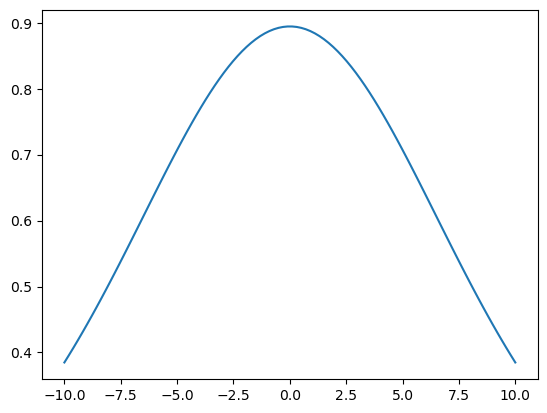

In [213]:
def B(x):
    L = 5
    r = 10

    return (x+L)/(np.sqrt((x+L)**2 + r**2)) - (x-L)/(np.sqrt((x-L)**2 + r**2))

x = np.linspace(-10, 10, 100)

plt.plot(x, B(x))

Hence, it is necessary, for an effective coilgun, to carefully time the activation of the coil: turning the supply current off too early risks not reaching the maximum theoretical speed, while turning the current off too late risks hindering the projectile's motion.

## Conclusions

The coilgun is a weapon that employs very basic physical phenomena. It harnesses the controlled magnetic field generated by a solenoid, along with the ferromagnetic properties of its projectile, in order to generate a force and accelerate a payload. However, achieving maximum efficiency in a coilgun is deceptively difficult, and requires precise timing. The coil must be turned off as soon as the projectile reaches the middle of it, which generally requires the use of complex high-speed detectors and computers. As a workaround for this bottleneck, many opt to set up multiple stages of coils, wherein the projectile passes through many coil assemblies as it travels down the barrel, in order to maximise the chance that it reaches its maximum speed. This limitation is the main reason why coilguns have not seen widespread use and adoption; successfully firing a coilgun requires a large and intricate assembly of sensors and equipment, none of which are required for operation of its cousin, the railgun.